In [1]:
# Import package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# unzip
import zipfile
import os
# 
path = 'Data/'

In [2]:
# Authenticating With API Server
from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()

In [3]:
!kaggle datasets download -d "pavansubhasht/ibm-hr-analytics-attrition-dataset"
!mv *.zip Data/
filename = !ls Data/*.zip

  0%|                                               | 0.00/50.1k [00:00<?, ?B/s]
100%|██████████████████████████████████████| 50.1k/50.1k [00:00<00:00, 1.13MB/s]


In [4]:
# Unzip
with zipfile.ZipFile(filename[0], mode='r') as unzipit:
    unzipit.extractall(path=path)
# Delete ZIP file
os.remove(filename[0])

In [5]:
csv = !ls Data/WA_Fn-UseC_-HR-Employee-Attrition.csv
csv = csv[0]
csv

'Data/WA_Fn-UseC_-HR-Employee-Attrition.csv'

In [6]:
df = pd.read_csv(csv)

In [7]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [8]:
# Change feature to categorical datatypes 
df = df.astype({"Attrition": 'category', "BusinessTravel": 'category', "Department": 'category', 
                "Education": 'category', "EducationField": 'category', "EnvironmentSatisfaction": 'category', 
                "Gender": 'category', "JobInvolvement": 'category', "JobLevel": 'category', 
                "JobLevel": 'category', "JobRole": 'category', "JobSatisfaction": 'category', 
                "MaritalStatus": 'category', "NumCompaniesWorked": 'category', "Over18": 'category', 
                "OverTime": 'category',"PerformanceRating": 'category',"RelationshipSatisfaction": 'category',
                "StockOptionLevel": 'category', "TrainingTimesLastYear": 'category',
                "WorkLifeBalance": 'category'})

In [9]:
rem = ['EmployeeCount', 'StandardHours','Over18','EmployeeNumber']
df.drop(rem, axis=1, inplace=True)

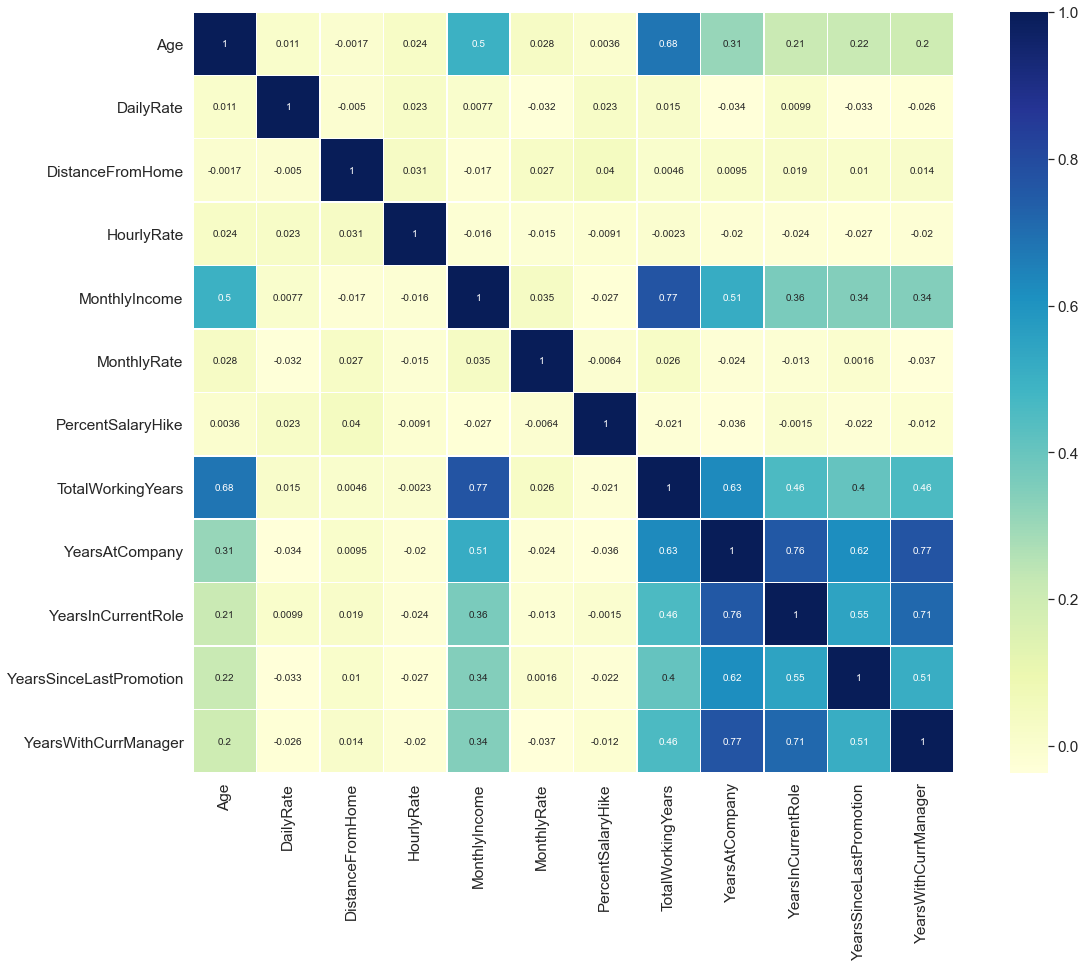

In [10]:
# Make a heatmap of the data
plt.figure(figsize=(20,14))
sns.set(font_scale = 1.4)
sns.heatmap(df.corr() ,annot=True, linewidths=.5, annot_kws={"size":10}, square=True, cmap='YlGnBu');

In [11]:
# listing of all the numeric columns
numeric_cols = df.select_dtypes(include=['int64']).columns.tolist()
# listing of all the categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

In [12]:
df[categorical_cols].describe().T

,count,unique,top,freq
Attrition,1470,2,No,1233
BusinessTravel,1470,3,Travel_Rarely,1043
Department,1470,3,Research & Development,961
Education,1470,5,3,572
EducationField,1470,6,Life Sciences,606
EnvironmentSatisfaction,1470,4,3,453
Gender,1470,2,Male,882
JobInvolvement,1470,4,3,868
JobLevel,1470,5,1,543
JobRole,1470,9,Sales Executive,326


In [13]:
df[numeric_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.0,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.0,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.0,7.0,14.00,29.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.0,66.0,83.75,100.0
MonthlyIncome,1470.0,6502.931293,4707.956783,1009.0,2911.0,4919.0,8379.00,19999.0
MonthlyRate,1470.0,14313.103401,7117.786044,2094.0,8047.0,14235.5,20461.50,26999.0
PercentSalaryHike,1470.0,15.209524,3.659938,11.0,12.0,14.0,18.00,25.0
TotalWorkingYears,1470.0,11.279592,7.780782,0.0,6.0,10.0,15.00,40.0
YearsAtCompany,1470.0,7.008163,6.126525,0.0,3.0,5.0,9.00,40.0
YearsInCurrentRole,1470.0,4.229252,3.623137,0.0,2.0,3.0,7.00,18.0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Age                       1470 non-null   int64   
 1   Attrition                 1470 non-null   category
 2   BusinessTravel            1470 non-null   category
 3   DailyRate                 1470 non-null   int64   
 4   Department                1470 non-null   category
 5   DistanceFromHome          1470 non-null   int64   
 6   Education                 1470 non-null   category
 7   EducationField            1470 non-null   category
 8   EnvironmentSatisfaction   1470 non-null   category
 9   Gender                    1470 non-null   category
 10  HourlyRate                1470 non-null   int64   
 11  JobInvolvement            1470 non-null   category
 12  JobLevel                  1470 non-null   category
 13  JobRole                   1470 non-null   catego

In [15]:
df.Attrition.replace(to_replace = dict({'No': 0, 'Yes': 1}), inplace = True)

In [16]:
# spliting training and testing data
from sklearn.model_selection import train_test_split
# 
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler
# 
from sklearn.decomposition import PCA
# 
seed = 11
size = 0.20
# 
# X, y full data
y =  df['Attrition']
X =  df.loc[:, df.columns != 'Attrition']
# 

In [17]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Age                       1470 non-null   int64   
 1   BusinessTravel            1470 non-null   category
 2   DailyRate                 1470 non-null   int64   
 3   Department                1470 non-null   category
 4   DistanceFromHome          1470 non-null   int64   
 5   Education                 1470 non-null   category
 6   EducationField            1470 non-null   category
 7   EnvironmentSatisfaction   1470 non-null   category
 8   Gender                    1470 non-null   category
 9   HourlyRate                1470 non-null   int64   
 10  JobInvolvement            1470 non-null   category
 11  JobLevel                  1470 non-null   category
 12  JobRole                   1470 non-null   category
 13  JobSatisfaction           1470 non-null   catego

#### Encode Catergoric Features

In [18]:
#  avoid dummy variable trap drop_first=True
X = pd.get_dummies(X, drop_first=True)

In [19]:
X.head()

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,...,StockOptionLevel_3,TrainingTimesLastYear_1,TrainingTimesLastYear_2,TrainingTimesLastYear_3,TrainingTimesLastYear_4,TrainingTimesLastYear_5,TrainingTimesLastYear_6,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4
0,41,1102,1,94,5993,19479,11,8,6,4,...,0,0,0,0,0,0,0,0,0,0
1,49,279,8,61,5130,24907,23,10,10,7,...,0,0,0,1,0,0,0,0,1,0
2,37,1373,2,92,2090,2396,15,7,0,0,...,0,0,0,1,0,0,0,0,1,0
3,33,1392,3,56,2909,23159,11,8,8,7,...,0,0,0,1,0,0,0,0,1,0
4,27,591,2,40,3468,16632,12,6,2,2,...,0,0,0,1,0,0,0,0,1,0


#### Data Normalization with sklearn

In [20]:
# data normalization with sklearn
# fit scaler on data
norm = MinMaxScaler().fit(X)

# transform data
X_norm = norm.transform(X)

In [21]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.DataFrame(X_norm, columns=X.columns).describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,0.450567,0.217509,0.0,0.285714,0.428571,0.595238,1.0
DailyRate,1470.0,0.501421,0.288840,0.0,0.259843,0.501074,0.755190,1.0
DistanceFromHome,1470.0,0.292590,0.289531,0.0,0.035714,0.214286,0.464286,1.0
HourlyRate,1470.0,0.512731,0.290420,0.0,0.257143,0.514286,0.767857,1.0
MonthlyIncome,1470.0,0.289307,0.247918,0.0,0.100158,0.205898,0.388099,1.0
MonthlyRate,1470.0,0.490629,0.285797,0.0,0.239028,0.487513,0.737503,1.0
PercentSalaryHike,1470.0,0.300680,0.261424,0.0,0.071429,0.214286,0.500000,1.0
TotalWorkingYears,1470.0,0.281990,0.194520,0.0,0.150000,0.250000,0.375000,1.0
YearsAtCompany,1470.0,0.175204,0.153163,0.0,0.075000,0.125000,0.225000,1.0
YearsInCurrentRole,1470.0,0.234958,0.201285,0.0,0.111111,0.166667,0.388889,1.0


#### Principal Component Analysis 

In [22]:
pca_norm = PCA()
principalComponents_norm = pca_norm.fit_transform(X_norm)

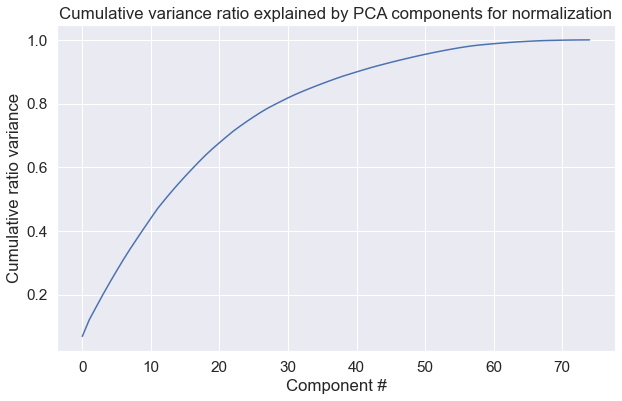

In [23]:
plt.subplots(figsize=(10, 6))
plt.plot(pca_norm.explained_variance_ratio_.cumsum())
plt.xlabel('Component #')
plt.ylabel('Cumulative ratio variance')
plt.title('Cumulative variance ratio explained by PCA components for normalization');

In [24]:
# Features below does NOT add value according to PCA analysis for normalize data
pd.DataFrame(pca_norm.explained_variance_ratio_.cumsum(), 
                  columns=["Feature Cumulative Sum"]).tail(10)

,Feature Cumulative Sum
65,0.995553
66,0.996635
67,0.997577
68,0.998147
69,0.998666
70,0.999076
71,0.999423
72,0.999689
73,0.999851
74,1.000000


#### SMOTE: Over-sampling

In [25]:
# import library for over sampling
from imblearn.over_sampling import SMOTE
#  
params = {'sampling_strategy' : 'auto',
          'random_state' : seed,
          'n_jobs' : (-1),
         }
# Model
over = SMOTE(**params)
# 
# fit predictor and target variable
X_over, y_over = over.fit_resample(X_norm, y)
# 
print('Original Full Features dataset count:', len(y))
print('Resample Full Features dataset count', len(y_over))
print('Resample Full Features dataset shape', X_over.shape)
# 

Original Full Features dataset count: 1470
Resample Full Features dataset count 2466
Resample Full Features dataset shape (2466, 75)


In [26]:
# Data set
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=size, 
                                                    stratify=y_over, random_state=seed)

#### Machine Learning

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import RepeatedStratifiedKFold, StratifiedKFold, RandomizedSearchCV
# 
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
# 
from numpy import mean
# 

In [28]:
# Params for All the Logistic Regression
params_lr = {
             'penalty' : 'l1',
             'solver' : 'liblinear', 
             'fit_intercept' : False,    
             'random_state' : seed,
            }
# 
lr = LogisticRegression(**params_lr)
lr.fit(X_test, y_test)
# 
lr_reg = lr.fit(X_train,y_train)
# 
y_pred_lr = lr_reg.predict(X_test)
# 
print(classification_report(y_test, y_pred_lr))
# 
print(lr_reg)
print('\n')
# 
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=seed)
# evaluate test model
scores_test = cross_val_score(lr_reg, X_test, y_test, 
                              scoring='roc_auc', cv=cv, n_jobs=-1)
# evaluate train model
scores_train = cross_val_score(lr_reg, X_train, y_train, 
                               scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
print('Mean Test  ROC AUC: %.4f' % mean(scores_test))
print('Mean Train ROC AUC: %.4f' % mean(scores_train))
print('\n')

              precision    recall  f1-score   support

           0       0.84      0.81      0.82       247
           1       0.81      0.84      0.83       247

    accuracy                           0.82       494
   macro avg       0.82      0.82      0.82       494
weighted avg       0.82      0.82      0.82       494

LogisticRegression(fit_intercept=False, penalty='l1', random_state=11,
                   solver='liblinear')


Mean Test  ROC AUC: 0.8495
Mean Train ROC AUC: 0.9083




#### XG Boost Classifier

              precision    recall  f1-score   support

           0       0.89      0.96      0.92       247
           1       0.95      0.88      0.91       247

    accuracy                           0.92       494
   macro avg       0.92      0.92      0.92       494
weighted avg       0.92      0.92      0.92       494

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='auc',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=-1,
              num_parallel_tree=1, random_state=11, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)


Mean Test  ROC AUC: 0.9478
Me

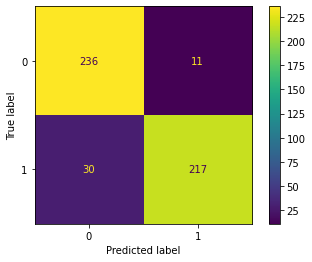

In [29]:
sns.reset_orig()
# 
params_xgb = {
    'objective':'binary:logistic',
    'use_label_encoder' : False,
    'n_jobs' : (-1),  
    'eval_metric' : 'auc',
    'random_state' : seed,
                }
# 
# Standard XGB Model
xgb_ = XGBClassifier(**params_xgb)
# 
#Train the model using the training sets
xgb_over = xgb_.fit(X_train,y_train)
# 
y_pred_xgb = xgb_over.predict(X_test)
# 
print(classification_report(y_test, y_pred_xgb))
print(xgb_over)
print('\n')
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=seed)
# evaluate test model
scores_test = cross_val_score(xgb_over, X_test, y_test, scoring='roc_auc', 
                              cv=cv, n_jobs=-1)
# evaluate train model
scores_train = cross_val_score(xgb_over, X_train, y_train, 
                               scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
print('Mean Test  ROC AUC: %.4f' % mean(scores_test))
print('Mean Train ROC AUC: %.4f' % mean(scores_train))
print('\n')
cm = confusion_matrix(y_test, y_pred_xgb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb_over.classes_)
disp.plot();
# 

Total Features in the Dataset: 75


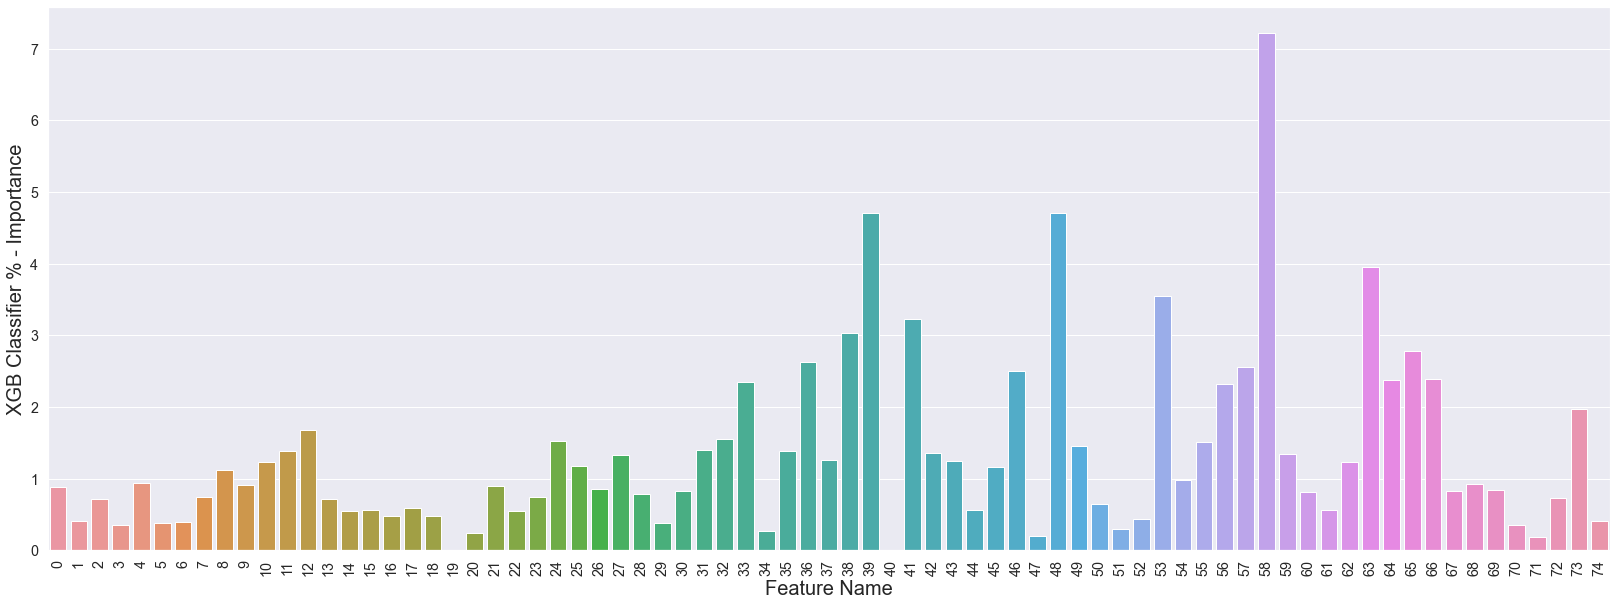

In [30]:
sns.reset_orig()
# 
df_ = pd.DataFrame(xgb_over.feature_importances_ * 100, 
                  columns=["XGB %-importance"])
# 
df_.reset_index(inplace=True)
df_.sort_values('XGB %-importance', ascending=False, inplace=True)
# 
sns.set(rc = {'figure.figsize':(28,10)}, font_scale = 1.3)
plot=sns.barplot(data=df_,  x="index", y="XGB %-importance")
plt.setp(plot.get_xticklabels(), rotation=90)
plot.set_xlabel("Feature Name", fontsize = 20)
plot.set_ylabel("XGB Classifier % - Importance", fontsize = 20);
# 
print('Total Features in the Dataset: ' + str(df_['index'].count()))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92       247
           1       0.94      0.89      0.92       247

    accuracy                           0.92       494
   macro avg       0.92      0.92      0.92       494
weighted avg       0.92      0.92      0.92       494

RandomForestClassifier(max_features=0.2, n_jobs=-1, random_state=11)


Mean Test  ROC AUC: 0.9370
Mean Train ROC AUC: 0.9809




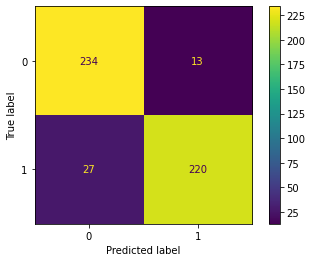

In [31]:
sns.reset_orig()
# 
params_rf = {'max_features' : 0.20,   ## random forest to take 20% of variables in individual run
             'n_jobs' : (-1),
             'random_state' : seed,
            }
#  Random Forest - Undersampling with Full Features
rfc_ = RandomForestClassifier(**params_rf)
# 
rfc_over = rfc_.fit(X_train, y_train)
# 
y_pred_rfc = rfc_over.predict(X_test)
# 
print(classification_report(y_test, y_pred_rfc))
# 
print(rfc_over)
print('\n')
# 
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=seed)
# evaluate test model
scores_test = cross_val_score(rfc_over, X_test, y_test, scoring='roc_auc', 
                              cv=cv, n_jobs=-1)
# evaluate train model
scores_train = cross_val_score(rfc_over, X_train, y_train, scoring='roc_auc', 
                               cv=cv, n_jobs=-1)
# summarize performance
print('Mean Test  ROC AUC: %.4f' % mean(scores_test))
print('Mean Train ROC AUC: %.4f' % mean(scores_train))
print('\n')
cm = confusion_matrix(y_test, y_pred_rfc)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rfc_over.classes_)
disp.plot();

Total Features in the Dataset: 75


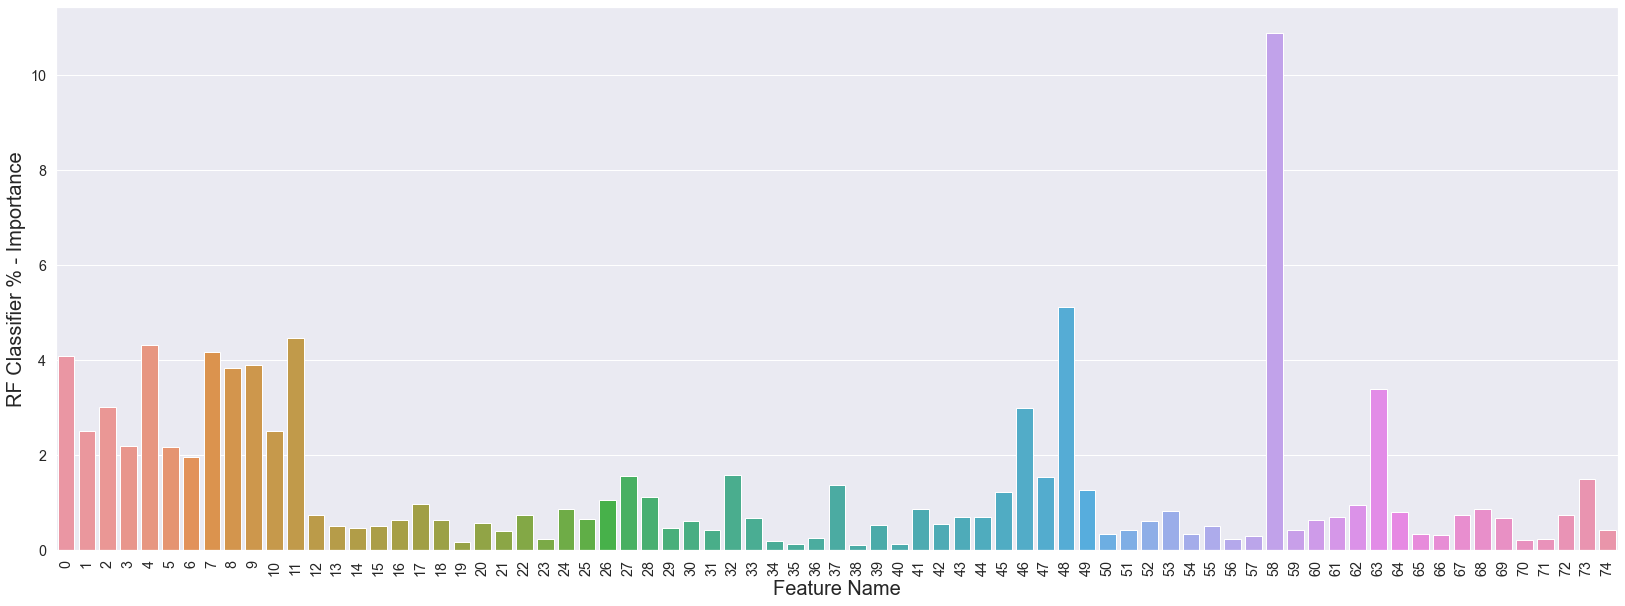

In [32]:
sns.reset_orig()
# 
df_ = pd.DataFrame(rfc_over.feature_importances_ * 100, 
                  columns=["RFC %-importance"])
# 
df_.reset_index(inplace=True)
df_.sort_values('RFC %-importance', ascending=False, inplace=True)
# 
sns.set(rc = {'figure.figsize':(28,10)}, font_scale = 1.3)
plot=sns.barplot(data=df_,  x="index", y="RFC %-importance")
plt.setp(plot.get_xticklabels(), rotation=90)
plot.set_xlabel("Feature Name", fontsize = 20)
plot.set_ylabel("RF Classifier % - Importance", fontsize = 20);
# 
print('Total Features in the Dataset: ' + str(df_['index'].count()))

#### XG Boost Classifier with CV

              precision    recall  f1-score   support

           0       0.91      0.96      0.93       247
           1       0.96      0.91      0.93       247

    accuracy                           0.93       494
   macro avg       0.93      0.93      0.93       494
weighted avg       0.93      0.93      0.93       494



{'subsample': 0.7, 'reg_lambda': 1.5, 'reg_alpha': 1, 'n_estimators': 250, 'min_child_weight': 3, 'max_depth': 7, 'learning_rate': 0.05, 'gamma': 0.1, 'colsample_bytree': 1.0}


Mean Test  ROC AUC: 0.9509
Mean Train ROC AUC: 0.9762




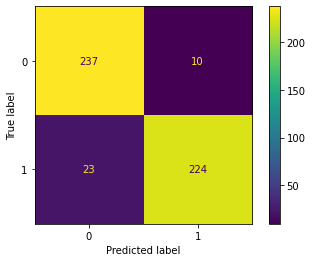

In [33]:
sns.reset_orig()
# 
params_xgb = {'objective' : 'binary:logistic',
              'use_label_encoder' : False,
              'n_jobs' : (-1),  
              'eval_metric' : 'auc',
              'random_state' : seed,
             }
# 
# Create XGB Classifier object
xgb_clf = XGBClassifier(**params_xgb)
# 
# Create parameter grid
parameters = {##"objective": ['binary:logistic', 'multi:softmax'],
              "learning_rate": [0.1, 0.05, 0.001],
              "gamma" : [0.01, 0.1, 0.3, 0.5, 1, 1.5, 2],
              "max_depth": [2, 4, 7, 10],
              "colsample_bytree": [0.3, 0.6, 0.8, 1.0],
              "subsample": [0.2, 0.4, 0.5, 0.6, 0.7],
              "reg_alpha": [0, 0.5, 1],
              "reg_lambda": [1, 1.5, 2, 3, 4.5],
              "min_child_weight": [1, 3, 5, 7],
              "n_estimators": [100, 250, 500, 1000],
             }
# 
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
# Create RandomizedSearchCV Object
xgb_rscv = RandomizedSearchCV(xgb_clf, param_distributions = parameters, scoring = "roc_auc",
                             cv = skf, verbose = 0, random_state = seed)

# Fit the model
xgb_CV = xgb_rscv.fit(X_train, y_train)
# 
y_pred_CV = xgb_CV.predict(X_test)
# 
print(classification_report(y_test, y_pred_CV))
print('\n')
print(xgb_CV.best_params_)
print('\n')
# 
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=seed)
# evaluate test model
scores_test = cross_val_score(xgb_CV, X_test, y_test, 
                              scoring='roc_auc', cv=cv, n_jobs=-1)
# evaluate train model
scores_train = cross_val_score(xgb_CV, X_train, y_train, 
                               scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
print('Mean Test  ROC AUC: %.4f' % mean(scores_test))
print('Mean Train ROC AUC: %.4f' % mean(scores_train))
print('\n')
cm = confusion_matrix(y_test, y_pred_CV)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb_CV.classes_)
disp.plot();
# 

Total Features in the Dataset: 75


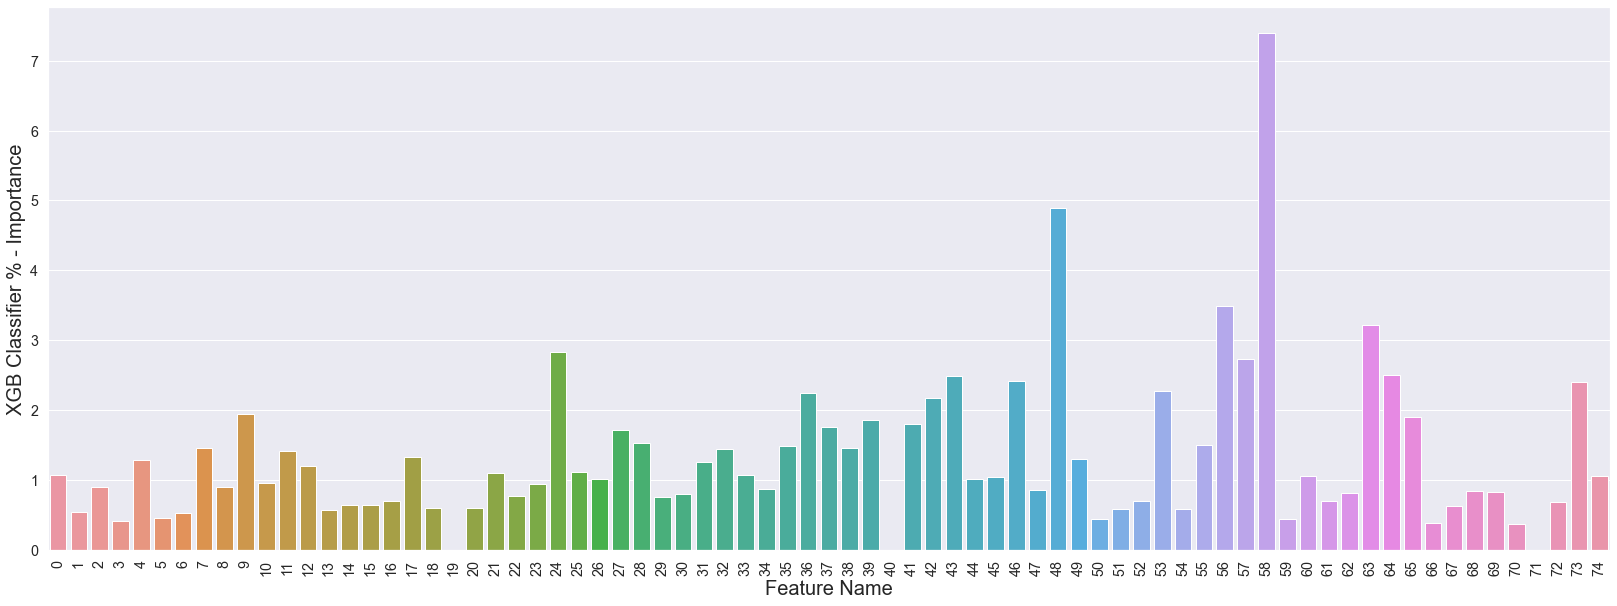

In [34]:
sns.reset_orig()
# 
df_ = pd.DataFrame(xgb_CV.best_estimator_.feature_importances_ * 100, 
                  columns=["XGB %-importance"])
# 
df_.reset_index(inplace=True)
df_.sort_values('XGB %-importance', ascending=False, inplace=True)
# 
sns.set(rc = {'figure.figsize':(28,10)}, font_scale = 1.3)
plot=sns.barplot(data=df_,  x="index", y="XGB %-importance")
plt.setp(plot.get_xticklabels(), rotation=90)
plot.set_xlabel("Feature Name", fontsize = 20)
plot.set_ylabel("XGB Classifier % - Importance", fontsize = 20);
# 
print('Total Features in the Dataset: ' + str(df_['index'].count()))

In [35]:
# 
import shap
shap.initjs()
# 

In [46]:
# Define a tree explainer for the built model
explainer = shap.TreeExplainer(xgb_over)
# obtain shap values for the first row of the test data
shap_values = explainer.shap_values(X_train)
shap_interaction_values = explainer.shap_interaction_values(X_train)
# 

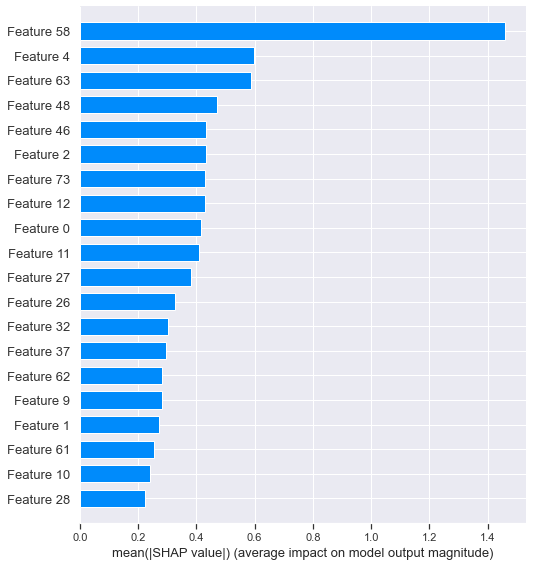

In [47]:
shap.summary_plot(shap_values, X_train, plot_type='bar');

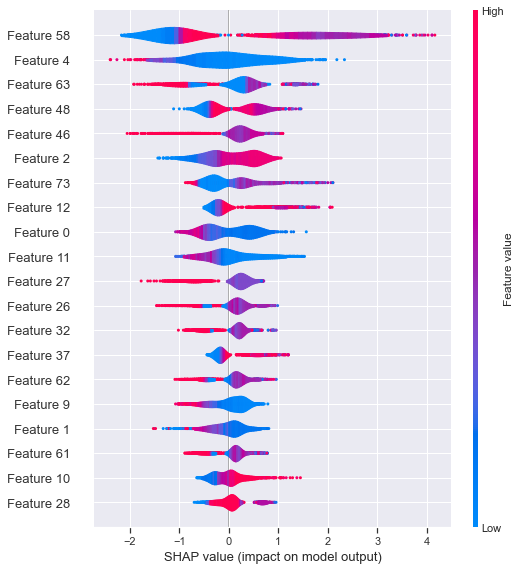

In [51]:
# summary plot
shap.summary_plot(shap_values, X_train, plot_type='violin');

In [60]:
shap.force_plot(explainer.expected_value, shap_values[0,:], X_train[0,:])

In [61]:
shap.force_plot(explainer.expected_value, shap_values[1,:], X_train[1,:])